In [2]:
model = TFBertModel.from_pretrained("indolem/indobert-base-uncased", from_pt=True)
tokenizer = BertTokenizer.from_pretrained("indolem/indobert-base-uncased", do_lower_case=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predict

In [99]:
a = tokenizer(["saya suka kamu", "kamu suka saya"], return_tensors="np")

In [100]:
print(a)

{'input_ids': array([[   3, 1731, 4346, 3162,    4],
       [   3, 3162, 4346, 1731,    4]]), 'token_type_ids': array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]]), 'attention_mask': array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])}


In [77]:
a = tokenizer.encode_plus("saya suka kamu", return_tensors="tf")

In [93]:
model(a)

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 5, 768), dtype=float32, numpy=
array([[[-0.4419437 , -0.3854164 ,  0.40307692, ..., -1.5920111 ,
         -1.0296483 ,  1.3499001 ],
        [ 0.7861722 , -0.67033714, -0.14220957, ..., -1.3011631 ,
         -1.5818292 ,  0.66848516],
        [ 0.5329278 ,  0.66236085,  0.26370198, ..., -1.0658575 ,
         -0.08243226,  1.8859752 ],
        [-0.21239184, -1.301323  , -0.01864386, ..., -1.4375464 ,
         -1.2756827 ,  1.333538  ],
        [-1.5403469 , -0.54620224,  0.2058937 , ..., -1.2940581 ,
          0.26325545,  0.3634153 ]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[ 0.56310797,  0.251387  ,  0.13200092,  0.53555983, -0.46030936,
        -0.8348407 ,  0.27238184,  0.6015707 , -0.23684156,  0.26655543,
         0.46752492,  0.3246772 , -0.25005418, -0.5944628 , -0.27367845,
         0.76913095, -0.38347015,  0.20927006,  0.24248761, -0.0919896

In [138]:
#pre_processing layer using tokenizer

preprocess = lambda x: tokenizer.encode_plus(list(x), return_tensors="tf", max_length=128, pad_to_max_length=True)
layer_preprocess = tf.keras.layers.Lambda(preprocess, name='preprocessing')


In [134]:
layer_preprocess

In [7]:
input_token_1 = tf.keras.layers.Input(shape=(128,), dtype='int32')
input_token_2 = tf.keras.layers.Input(shape=(128,), dtype='int32')
input_attn_1 = tf.keras.layers.Input(shape=(128,), dtype='int32')
input_attn_2 = tf.keras.layers.Input(shape=(128,), dtype='int32')
input_token_type_1 = tf.keras.layers.Input(shape=(128,), dtype='int32')
input_token_type_2 = tf.keras.layers.Input(shape=(128,), dtype='int32')
input_1 = [input_token_1, input_attn_1, input_token_type_1]
input_2 = [input_token_2, input_attn_2, input_token_type_2]

x = model(input_1).last_hidden_state
y = model(input_2).last_hidden_state
cosine = tf.keras.layers.Dot(axes=1, normalize=True)([x, y])
model_final = tf.keras.Model([input_1, input_2], cosine)



In [9]:
model_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                              

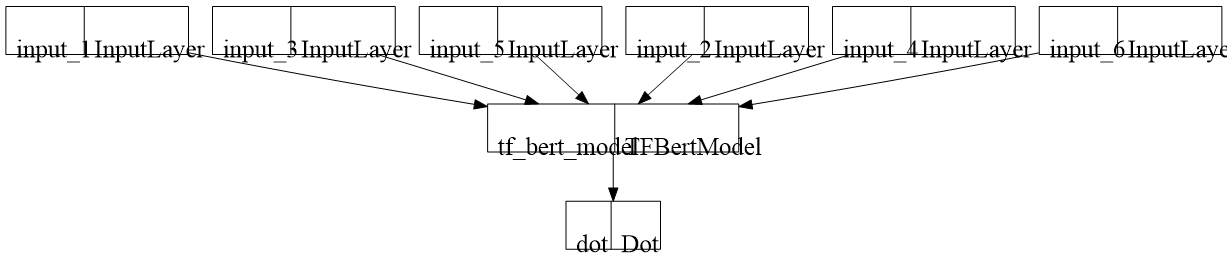

In [11]:
tf.keras.utils.plot_model(model_final)